In [27]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/sudiy/OneDrive/Desktop/Big_data_Assignment corn_data set.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())

# Show the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OB_DT    422 non-null    object 
 1   PMAIZMT  422 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB
None


,OB_DT,PMAIZMT
0,1/1/1990,105.900513
1,2/1/1990,106.294167
2,3/1/1990,109.837318
3,4/1/1990,118.498337
4,5/1/1990,121.254097


In [29]:
# Convert OB_DT to datetime format
df["OB_DT"] = pd.to_datetime(df["OB_DT"], format="%m/%d/%Y")

In [31]:
# Convert PMAIZMT to float format
df["PMAIZMT"] = df["PMAIZMT"].astype(float)

In [33]:
# Save changes
df.to_csv("modified_data_Big_data_Assignment corn_data se.csv", index=False)


In [35]:
# Confirm the change
print(df.dtypes)

# Show first few rows again
df.head()


OB_DT      datetime64[ns]
PMAIZMT           float64
dtype: object


,OB_DT,PMAIZMT
0,1990-01-01,105.900513
1,1990-02-01,106.294167
2,1990-03-01,109.837318
3,1990-04-01,118.498337
4,1990-05-01,121.254097


In [37]:
#Check for Missing Values
print(df.isnull().sum())  # Shows count of missing values per column


OB_DT      0
PMAIZMT    0
dtype: int64


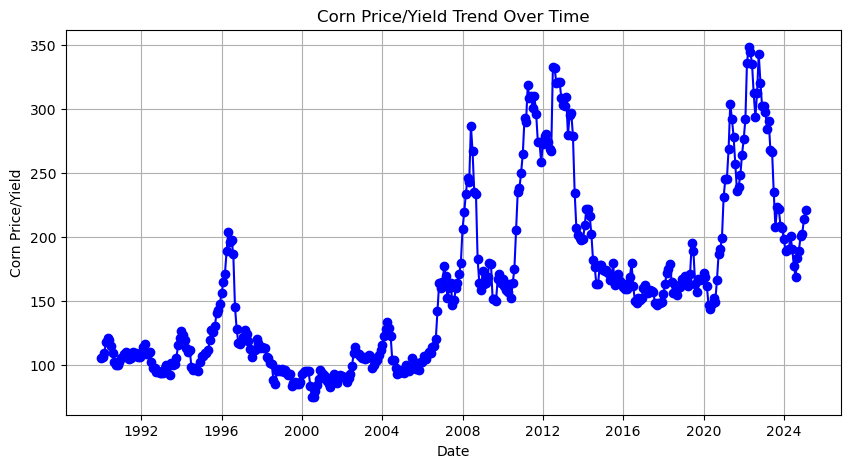

In [39]:
#Plot the corn price over time to see trends.
import matplotlib.pyplot as plt  

plt.figure(figsize=(10,5))
plt.plot(df["OB_DT"], df["PMAIZMT"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Corn Price/Yield")
plt.title("Corn Price/Yield Trend Over Time")
plt.grid(True)
plt.show()


In [44]:
# Create new time-based features
df["Year"] = df["OB_DT"].dt.year
df["Month"] = df["OB_DT"].dt.month

# Drop the original date column (not needed for ML models)
df = df.drop(columns=["OB_DT"])

# Show the updated dataset
df.head()


,PMAIZMT,Year,Month
0,105.900513,1990,1
1,106.294167,1990,2
2,109.837318,1990,3
3,118.498337,1990,4
4,121.254097,1990,5


In [46]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["PMAIZMT"])  # Features: Year, Month, Day
y = df["PMAIZMT"]  # Target: Corn Price/Yield

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (337, 2), Testing data: (85, 2)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f"Model Performance: RMSE = {rmse:.2f}, R² = {r2:.2f}")


Model Performance: RMSE = 55.73, R² = 0.09


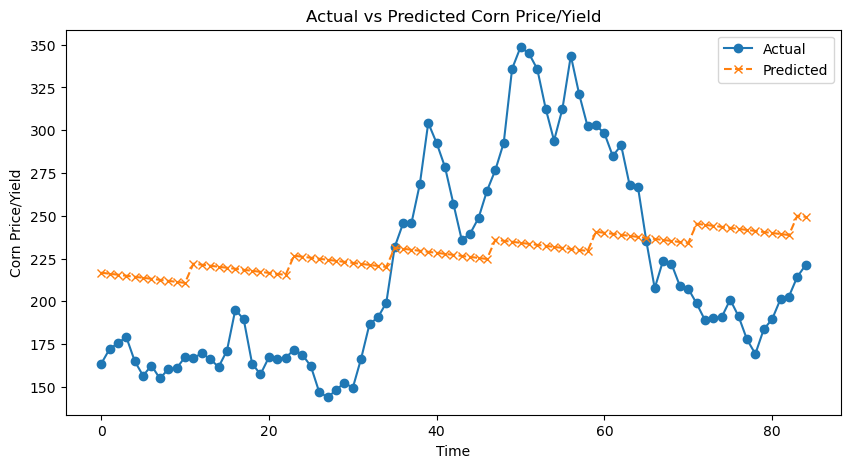

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", marker="o")
plt.plot(y_pred, label="Predicted", marker="x", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Corn Price/Yield")
plt.title("Actual vs Predicted Corn Price/Yield")
plt.legend()
plt.show()
